<a href="https://colab.research.google.com/github/jessy235/Simulacion-II/blob/main/MC_CRUDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t


In [103]:
# Definimos la función
def g(x):
    return np.sqrt(np.arctan(x))

In [104]:
# Monte Carlo "crudo" (bloques)
def mc_crudo(N):
    lista = []
    for i in range(N):
        u = np.random.random()
        lista.append(g(u))
    return np.mean(lista)

In [121]:

def simulacion(num_reps=1000, N=1000, alpha=0.05):
    L = []   # resultados de cada bloque
    M = []   # medias acumuladas
   #  Simulación
    for i in range(num_reps):
     x = mc_crudo(N)           # bloque Monte Carlo
     L.append(x)
     M.append(np.mean(L))      # promedio acumulado
     #  Estadísticos
    media = np.mean(L)
    varianza = np.var(L, ddof=1)
    desv = np.sqrt(varianza)
   # Intervalo de confianza con t de Student
    t_crit = t.ppf(1 - alpha/2, len(L)-1)
    margen_error = t_crit * desv / np.sqrt(len(L))
    IC = (media - margen_error, media + margen_error)

In [133]:
 #  Imprimir resultados
print("Resultados de la simulación:")
print("Media:", media)
print("Varianza:", varianza)
print("Intervalo de confianza al 95%:", IC)



Resultados de la simulación:
Media: 0.6296678392797662
Varianza: 4.175285586377946e-05
Intervalo de confianza al 95%: (np.float64(0.6292668639317265), np.float64(0.630068814627806))


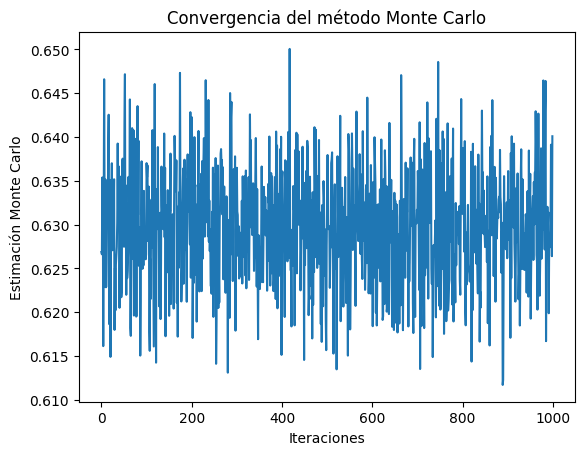

In [138]:

L = []
for i in range(1000):   # 1000 iteraciones
    res = mc_crudo(1000)   # cada vez corre Monte Carlo con 1000 muestras
    L.append(res)

plt.plot(L)
plt.xlabel("Iteraciones")
plt.ylabel("Estimación Monte Carlo")
plt.title("Convergencia del método Monte Carlo")
plt.show()
